<a href="https://colab.research.google.com/github/EmmaMills1002/DS-3001-Project/blob/main/CovidCleanedCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/COVID-19 Survey Student Responses.csv',low_memory=False)
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [2]:
df.isnull().sum()

,0
ID,0
Region of residence,0
Age of Subject,0
Time spent on Online Class,0
Rating of Online Class experience,24
Medium for online class,51
Time spent on self study,0
Time spent on fitness,0
Time spent on sleep,0
Time spent on social media,0


In [3]:
df = df.dropna()

In [4]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['id', 'region of residence', 'age of subject',
       'time spent on online class', 'rating of online class experience',
       'medium for online class', 'time spent on self study',
       'time spent on fitness', 'time spent on sleep',
       'time spent on social media', 'prefered social media platform',
       'time spent on tv', 'number of meals per day', 'change in your weight',
       'health issue during lockdown', 'stress busters', 'time utilized',
       'do you find yourself more connected with your family, close friends , relatives  ?',
       'what you miss the most'],
      dtype='object')

In [5]:
numeric_status = df.dtypes.apply(pd.api.types.is_numeric_dtype)
print(numeric_status)

id                                                                                    False
region of residence                                                                   False
age of subject                                                                         True
time spent on online class                                                             True
rating of online class experience                                                     False
medium for online class                                                               False
time spent on self study                                                               True
time spent on fitness                                                                  True
time spent on sleep                                                                    True
time spent on social media                                                             True
prefered social media platform                                                  

In [6]:
df.duplicated().sum()

0

In [8]:
stress = df['stress busters']
stress = stress.replace(['Scrolling through social media', 'Social Media', 'Online surfing', 'Both listining music and scrolling down social media'], 'Social Media')
stress = stress.replace(['Listening to music', 'Music', 'listening to music,reading books and dancing.', ' listening music, motion design, graphic design, sleeping.', 'Listening to music and reading books both . '], 'Music')
stress = stress.replace(['Reading', 'Reading books', 'Writing my own Comics & novels', 'Reading books, music, exercise', 'All reading books watching web series listening to music and talking to friends','Poetry, writing books and novels , listening to music too' ], 'Reading')
stress = stress.replace(['Watching web series', 'live stream watching', 'Watching orgasm releasing videos', 'Web Series', 'Anime Manga', 'watching movies,reading books,games,listening to music,sleep,dancing', 'Netflix, Friends and Books', 'Watching ted talks and music and books', 'Youtube', 'Watching YouTube '], 'Watching Videos')
stress = stress.replace(['Coding and studying for exams', 'Online gaming', 'Indoor Games', 'Online gaming , surfing and listening to music '], 'Online Gaming')
stress = stress.replace(['Cricket', 'Workout ', 'Dancing', 'Playing ', 'Meditation', 'Exercise', 'I run', 'Running', 'Exercising', 'Football', 'Cardio', 'working out and some physical activity', 'Gym', 'workout', 'Workout and listening music', 'Sports'], 'Exercise')
stress = stress.replace(['Talking with friends ', 'Talking', 'Talking to your relatives', 'Talk with childhood friends.', 'Talking to friends', 'With a friend', 'Calling friends', 'Taking with parents'], 'Talking to Friends and Family')
stress = stress.replace(['sketching,reading books,meditation,songs', 'drawing ', 'Sketching and writing', 'Writing','gardening cartoon', 'Painting,. Sewing', 'Drawing', 'Painting', 'Sketching', 'Drawing, painting', 'Drawing and painting and sketching', 'Painting '], 'Art')
stress = stress.replace(['Work', 'By engaging in my work.', 'Business'], 'Work')
stress = stress.replace(['Sleep', 'Sleeping', 'Sleeping, Online games'], 'Sleep')
stress = stress.replace(['I have no problem of stress ', 'Dont get distreessed', 'no stress'], 'No Stress')
stress = stress.replace(['Many of these', 'Many among these ', 'Whatever want'], 'Many')
stress = stress.replace(['I cant de-stress myslef', 'No able to reduce the stress '], 'None')
stress = stress.replace(['singing'], 'Singing')
stress = stress.replace(['Do some home related stuff', 'I play Rubiks cube', 'pubg', 'Forming '], 'Other')

In [9]:
df['stress busters'] = stress
del stress
df['stress busters'].value_counts()

,count
stress busters,
Music,263
Online Gaming,171
Social Media,145
Watching Videos,122
Sleep,102
Reading,94
Exercise,93
Talking to Friends and Family,56
Cooking,37


In [10]:
df['what you miss the most'].unique()
miss = df['what you miss the most']
miss = miss.replace(['School/college', 'School and friends.', 'School and my school friends', 'school, relatives and friends'], 'School')
miss = miss.replace(['Friends', 'Family', 'Friends and roaming around freely','Friends, relatives & travelling', 'Friends , relatives', 'Being social ', 'Friends and School', 'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends', 'Friends,Romaing and traveling', 'Only friends', 'Family '], 'Friends and Family')
miss = miss.replace(['Normal life', 'My normal routine'], 'Normalcy')
miss = miss.replace(['Travelling', 'Travelling & Friends'], 'Traveling')
miss = miss.replace(['Roaming around freely', 'Gym', 'Badminton in court', 'Metro', 'Taking kids to park', 'Eating outside and friends.', 'Going to the movies'], 'Going Places')
miss = miss.replace(['Colleagues', 'Job'], 'Work')
miss = miss.replace(['Eating outside'], 'Eating Outside')
miss = miss.replace(['Nothing this is my usual life', 'To stay alone. ','I have missed nothing ', 'nothing', 'NOTHING', 'Nothing', 'Nothing ', 'Nah, this is my usual lifestyle anyway, just being lazy....'], 'Nothing')
miss = miss.replace(['All of them', 'All of the above ','everything', 'ALL', 'all', 'All the above', 'All above', 'All of the above', 'All ', 'All', 'all of the above'], 'Everything')
miss = miss.replace(['.', 'Previous mistakes'], 'Other')

In [11]:
df['what you miss the most'] = miss
del miss
df['what you miss the most'].value_counts()

,count
what you miss the most,
School,367
Friends and Family,219
Traveling,167
Going Places,151
Eating Outside,98
Work,66
Everything,25
Nothing,18
Football,1


In [14]:
print(df['age of subject'].unique())
print(df['age of subject'].describe())

[21 20 19 22 31 23 17 24 18 25 16 10 14 15 34 26 59 32 30 13 29 12 43 40
 42 27  9 36  8 28 50 35 45  7 11 44 46 52 38 37 33 39]
count    1115.000000
mean       20.149776
std         5.480174
min         7.000000
25%        17.000000
50%        20.000000
75%        21.000000
max        59.000000
Name: age of subject, dtype: float64


In [16]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
df['age group'] = pd.cut(df['age of subject'], bins=bins, labels=labels, right=False)

In [18]:
df.head()

,id,region of residence,age of subject,time spent on online class,rating of online class experience,medium for online class,time spent on self study,time spent on fitness,time spent on sleep,time spent on social media,prefered social media platform,time spent on tv,number of meals per day,change in your weight,health issue during lockdown,stress busters,time utilized,"do you find yourself more connected with your family, close friends , relatives ?",what you miss the most,age group
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School,20-24
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Social Media,YES,NO,Going Places,20-24
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Music,NO,YES,Traveling,20-24
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching Videos,NO,NO,Friends and Family,20-24
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Traveling,20-24


<Axes: xlabel='age of subject'>

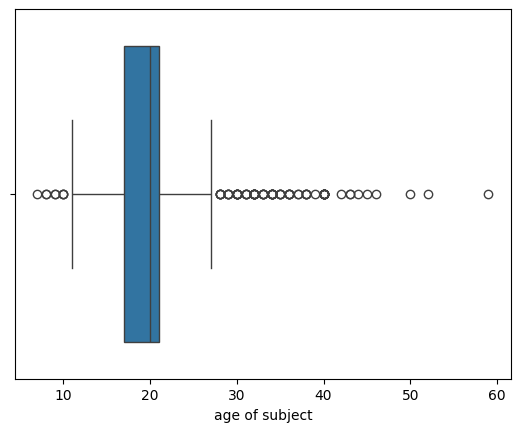

In [22]:
import seaborn as sns
sns.boxplot(x='age of subject', data=df)

In [24]:
df['time spent on online class'].describe()

,time spent on online class
count,1115.000000
mean,3.306771
std,2.080345
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,10.000000


<Axes: xlabel='time spent on online class'>

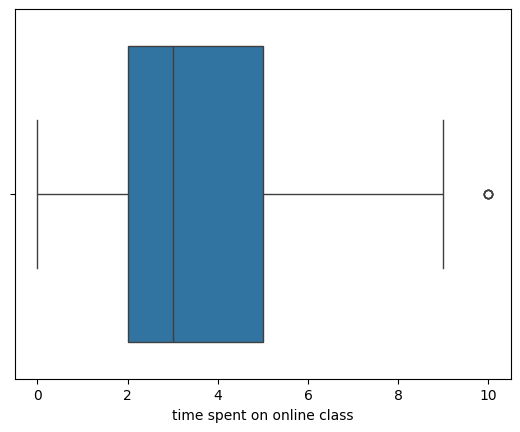

In [25]:
sns.boxplot(x = df['time spent on online class'])